# Analysis of Crime Reports in the City and County of Denver

#### Chris Richards
#### Practicum 2, Summer 2020
#### Regis University


### Data Cleaning

In [3]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [4]:
# stop dataframe copy warning
#pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
df = pd.read_csv(r"E:\Regis\Practicum_2\crime.csv")
df_profile = df

In [6]:
df.shape

(497912, 19)

The data frame consists of 497,912 rows and 19 columns.  
  
##### Get stats on the quantitative features

In [7]:
df.describe()

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,IS_CRIME,IS_TRAFFIC
count,4.979120e+05,4.979120e+05,497912.000000,497912.000000,4.936050e+05,4.936050e+05,4.936050e+05,493605.000000,497912.000000,497912.000000,497912.000000,497912.000000
mean,3.978004e+09,3.978004e+15,3780.867053,0.204241,3.165528e+06,1.695747e+06,-1.049223e+02,39.717631,3.520721,369.612893,0.746058,0.254509
std,1.302073e+10,1.302073e+16,1654.320957,0.576514,7.323260e+05,1.801466e+05,2.049321e+00,0.776045,1.782135,178.993256,0.435266,0.435585
min,2.015800e+04,2.015854e+10,902.000000,0.000000,1.000000e+00,1.000000e+00,-1.154641e+02,0.000000,1.000000,111.000000,0.000000,0.000000
25%,2.015730e+09,2.015730e+15,2305.000000,0.000000,3.138713e+06,1.683263e+06,-1.050067e+02,39.708053,2.000000,221.000000,0.000000,0.000000
50%,2.017621e+09,2.017621e+15,3550.000000,0.000000,3.145604e+06,1.694794e+06,-1.049823e+02,39.739838,3.000000,323.000000,1.000000,0.000000
75%,2.019385e+09,2.019385e+15,5441.000000,0.000000,3.162366e+06,1.701839e+06,-1.049228e+02,39.759115,5.000000,521.000000,1.000000,1.000000
max,2.020890e+12,2.020890e+18,7399.000000,5.000000,4.067477e+07,1.141836e+07,5.000000e-07,39.904311,7.000000,759.000000,1.000000,1.000000


##### Get information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497912 entries, 0 to 497911
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   INCIDENT_ID             497912 non-null  float64
 1   OFFENSE_ID              497912 non-null  int64  
 2   OFFENSE_CODE            497912 non-null  int64  
 3   OFFENSE_CODE_EXTENSION  497912 non-null  int64  
 4   OFFENSE_TYPE_ID         497912 non-null  object 
 5   OFFENSE_CATEGORY_ID     497912 non-null  object 
 6   FIRST_OCCURRENCE_DATE   497912 non-null  object 
 7   LAST_OCCURRENCE_DATE    160309 non-null  object 
 8   REPORTED_DATE           497912 non-null  object 
 9   INCIDENT_ADDRESS        451097 non-null  object 
 10  GEO_X                   493605 non-null  float64
 11  GEO_Y                   493605 non-null  float64
 12  GEO_LON                 493605 non-null  float64
 13  GEO_LAT                 493605 non-null  float64
 14  DISTRICT_ID         

486,239 entries. The majority of columns have no missing values, although, several do with the last occurrence date missing several hundred thousand entries. There are a mix of data types including integers, floats and strings, noted as "object".  Notably, the various data fields are read in as strings.  These will be recast as date types.

In [9]:
df.head(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2.018870e+09,2018869789239900,2399,0,theft-other,larceny,12/27/2018 15:58,NaN,12/27/2018 16:51,2681 N HANOVER CT,3178210.0,1700715.0,-104.866156,39.755561,5,512,stapleton,1,0
1,2.015664e+09,2015664356544100,5441,0,traffic-accident,traffic-accident,11/13/2015 7:45,NaN,11/13/2015 8:38,4100 BLOCK W COLFAX AVE,3129148.0,1694748.0,-105.040760,39.739991,1,122,west-colfax,0,1
2,2.017601e+10,20176005213239900,2399,1,theft-bicycle,larceny,6/8/2017 13:15,6/8/2017 17:15,6/12/2017 8:44,1705 17TH ST,3140790.0,1699792.0,-104.999264,39.753669,6,612,union-station,1,0
3,2.019601e+10,20196012240230800,2308,0,theft-from-bldg,larceny,12/7/2019 13:07,12/7/2019 18:30,12/9/2019 13:35,1350 N IRVING ST,3132400.0,1694088.0,-105.029208,39.738134,1,122,west-colfax,1,0
4,2.018862e+09,2018861883501600,5016,0,violation-of-restraining-order,all-other-crimes,12/22/2018 20:15,12/22/2018 20:31,12/22/2018 22:00,13625 E RANDOLPH PL,3188580.0,1716158.0,-104.828868,39.797750,5,521,montbello,1,0


In [10]:
df.tail(5)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
497907,2.020367e+09,2020367366239900,2399,0,theft-other,larceny,6/5/2020 15:00,6/6/2020 9:00,6/16/2020 13:18,3001 N FOX ST,3141763.0,1702051.0,-104.995758,39.759856,6,612,five-points,1,0
497908,2.020334e+09,2020334438240400,2404,0,theft-of-motor-vehicle,auto-theft,5/29/2020 21:00,5/29/2020 21:00,5/30/2020 13:17,4701 N PEORIA ST,3183298.0,1710785.0,-104.847803,39.783106,5,511,montbello,1,0
497909,2.020601e+10,20206006564299900,2999,1,criminal-mischief-mtr-veh,public-disorder,5/31/2020 19:10,6/1/2020 7:10,6/1/2020 19:17,1735 N OGDEN ST,3147584.0,1696363.0,-104.975171,39.744151,6,621,north-capitol-hill,1,0
497910,2.020357e+09,2020357471230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,6/10/2020 22:15,6/11/2020 10:30,6/11/2020 11:04,6343 E GIRARD PL,3164075.0,1663852.0,-104.917270,39.654625,3,323,hampden,1,0
497911,2.020359e+09,2020358542131500,1315,0,aggravated-assault,aggravated-assault,6/11/2020 21:58,NaN,6/11/2020 22:35,STOUT ST / PARK AVEW,3144912.0,1699350.0,-104.984612,39.752392,6,621,five-points,1,0


Examining the observations, it is clear that the text fields contain hyphens which may cause issues.  These will be removed.  
Further issues exist with the "incident id" and "offense id" fields.  These have been converted to floats when they are not used as numeric features but instead are categorical labels identifying either the individual crime report or offense identifier.  I will most likely drop these features as indentifiers such as these typically do not provide value in a model.  
  
  The last two features, "is crime" and "is traffic", are flags indicating the category (crime or traffic) of the report.  This project will focus on crime reports only, so the traffic reports will be dropped from the data.  

#### Count Null Values

In [11]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()  

LAST_OCCURRENCE_DATE    337603
INCIDENT_ADDRESS         46815
GEO_X                     4307
GEO_Y                     4307
GEO_LON                   4307
GEO_LAT                   4307
dtype: int64

As noted, this dataset contains a large number of missing values.  

The largest number of missing values occurs in the "last occurrence date" column.  Analyzing the various "report" features we find that there are two others beside the "last occurrence date".  They are "first occurrence date" and "reported date".  
  
The "first occurrence date" field contains no missing data, however, it appears that this field is filled using January 1st, 0:00 hours, of the year the report was filed.  This appears to be the case for types of crime that may occur over long periods of time, such as identity theft.  It seems reasonable to conclude that the report writer's use the January 1st date as a "default" date when an exact start date of the crime is unknown, but the crime has occurred over a period of time.  Fortunately, the "reported date" does not suffer from these issues.  I will use 'reported_date' as the incident date in this project.
  
The column headings are all uppercase.  I will convert them to lowercase for ease of use.

In [12]:
# convert headings to lowercase using map and .lower() method
df.columns = map(str.lower, df.columns)
df.columns 

Index(['incident_id', 'offense_id', 'offense_code', 'offense_code_extension',
       'offense_type_id', 'offense_category_id', 'first_occurrence_date',
       'last_occurrence_date', 'reported_date', 'incident_address', 'geo_x',
       'geo_y', 'geo_lon', 'geo_lat', 'district_id', 'precinct_id',
       'neighborhood_id', 'is_crime', 'is_traffic'],
      dtype='object')

I'll convert the "reported_date" field to a date/time data type.

In [13]:
# convert to date/time
df['reported_date'] = pd.to_datetime(df['reported_date'])

I'll remove the traffic reports from the dataframe.

In [14]:
# select all rows where 'is_traffic' is 0.  The traffic reports are identified with a 1 in this column.
df = df.loc[df['is_traffic'] == 0].copy(deep = True)

  
I'll check the operation by examining the unique values found in the 'is_traffic' and 'is_crime' columns.

In [15]:
print(f'Values in \'is_traffic\'column: ' , df['is_traffic'].unique())
print(f'Values in \'is_crime\' column: ' , df['is_crime'].unique())

Values in 'is_traffic'column:  [0]
Values in 'is_crime' column:  [1]


The unique values are correct.  All values in the 'is_crime' column are 1s which indicates that only crime report observations remain in the data set.  
I'll recheck the dataframe using the .info method.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371189 entries, 0 to 497911
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371189 non-null  float64       
 1   offense_id              371189 non-null  int64         
 2   offense_code            371189 non-null  int64         
 3   offense_code_extension  371189 non-null  int64         
 4   offense_type_id         371189 non-null  object        
 5   offense_category_id     371189 non-null  object        
 6   first_occurrence_date   371189 non-null  object        
 7   last_occurrence_date    159918 non-null  object        
 8   reported_date           371189 non-null  datetime64[ns]
 9   incident_address        339092 non-null  object        
 10  geo_x                   366882 non-null  float64       
 11  geo_y                   366882 non-null  float64       
 12  geo_lon                 366882

The number of observations has been reduced to 371,189.  
  
  Since the crime and traffic report indicator columns are no longer needed I will drop them from the dataframe.

In [17]:
df.drop(columns=['is_crime', 'is_traffic'], axis=1, inplace=True) #axis=1 refers to column-wise operations.  inplace=True saves the drop to .

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371189 entries, 0 to 497911
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371189 non-null  float64       
 1   offense_id              371189 non-null  int64         
 2   offense_code            371189 non-null  int64         
 3   offense_code_extension  371189 non-null  int64         
 4   offense_type_id         371189 non-null  object        
 5   offense_category_id     371189 non-null  object        
 6   first_occurrence_date   371189 non-null  object        
 7   last_occurrence_date    159918 non-null  object        
 8   reported_date           371189 non-null  datetime64[ns]
 9   incident_address        339092 non-null  object        
 10  geo_x                   366882 non-null  float64       
 11  geo_y                   366882 non-null  float64       
 12  geo_lon                 366882

The two crime type indicator columns have been dropped.  
  
There are still quite a few missing values in several of the columns.  I'm curious as to why there are so many missing values in the geolocation features.  I'll find the rows where the null occurs in one of the geolocation features and analyze the results.

In [19]:
#df[df["geo_x"].isnull()][null_columns]
df[df["geo_x"].isnull()]

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id
9,2.016830e+09,2016829592110200,1102,0,sex-aslt-rape,sexual-assault,12/30/2016 23:00,12/30/2016 23:45,2016-12-31 04:59:00,NaN,NaN,NaN,NaN,NaN,6,611,five-points
70,2.018616e+09,2018616158110200,1102,0,sex-aslt-rape,sexual-assault,9/8/2018 8:00,NaN,2018-09-08 16:38:00,NaN,NaN,NaN,NaN,NaN,1,111,regis
290,2.020698e+08,202069781110200,1102,0,sex-aslt-rape,sexual-assault,1/31/2020 16:00,NaN,2020-01-31 18:04:00,NaN,NaN,NaN,NaN,NaN,6,612,union-station
291,2.015517e+09,2015516797360100,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,9/5/2015 19:30,9/6/2015 8:00,2015-09-06 21:00:00,NaN,NaN,NaN,NaN,NaN,4,423,bear-valley
441,2.017447e+08,201744713110900,1109,0,sex-aslt-non-rape,sexual-assault,1/19/2017 23:00,1/20/2017 3:00,2017-01-21 00:41:00,NaN,NaN,NaN,NaN,NaN,2,213,city-park
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497169,2.020343e+09,2020343067110200,1102,0,sex-aslt-rape,sexual-assault,6/3/2020 2:30,NaN,2020-06-03 19:06:00,NaN,NaN,NaN,NaN,NaN,6,611,civic-center
497205,2.020384e+09,2020383889110900,1109,0,sex-aslt-non-rape,sexual-assault,6/24/2019 8:00,NaN,2020-06-24 10:15:00,NaN,NaN,NaN,NaN,NaN,4,412,westwood
497703,2.020373e+09,2020373180360100,3601,1,sex-aslt-fondle-adult-victim,sexual-assault,6/19/2020 9:40,NaN,2020-06-19 10:42:00,NaN,NaN,NaN,NaN,NaN,6,611,cbd
497860,2.020386e+09,2020386349110200,1102,0,sex-aslt-rape,sexual-assault,6/21/2020 3:00,6/21/2020 12:00,2020-06-25 11:19:00,NaN,NaN,NaN,NaN,NaN,6,623,capitol-hill


It appears from the sample of rows that the crime category (the 'offense_category_id' feature) contains sexual assault crimes only.  
  
  I'll check the unique values in that column to verify that assumption.

In [20]:
missing_geo = df[df["geo_x"].isnull()]
offense_cat_na = missing_geo['offense_category_id'].unique()
print(f'Values in \'offense category\' column: ' , offense_cat_na)


Values in 'offense category' column:  ['sexual-assault']


The only value is 'sexual-assault' which confirms my assumption.  It is most likely department policy to prevent the release of address or location information of sexual assault crimes in order to protect the privacy of the victim.  
  
This missing geolocation data will present an issue with mapping these types of crime.  I hesitate to remove them from the dataset as a solution. I feel they are too important to the analysis.  
  
In order to keep the information on these crimes and to facilitate mapping, an alternate location should be used.  Denver has seven police districts, including Denver International Airport (DIA), with many precincts and stations in each district.  In addition, there is a primary station in each district whose location will be used as the location for sexual assault crimes.  
  
This station information is available on the City of Denver website, but, does not include latitude and longtitude information.  I took the address information for each of the seven district police stations and performed a lat/lon lookup online.  That information was added to the police station data and will be combined with the crime dataset.  
  


In [21]:
# load police stations data
stations_df = pd.read_csv(r"E:\Regis\Practicum_2\police_stations.csv")
stations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   POLICE_STATION_ID  23 non-null     int64  
 1   STATION            23 non-null     object 
 2   STATION_NAME       23 non-null     object 
 3   ADDRESS_ID         23 non-null     object 
 4   ADDRESS_LINE1      23 non-null     object 
 5   ADDRESS_LINE2      23 non-null     object 
 6   CITY               23 non-null     object 
 7   STATE              23 non-null     object 
 8   ZIP                23 non-null     int64  
 9   PHONE_NUMBER       23 non-null     object 
 10  FAX_NUMBER         23 non-null     object 
 11  DISTRICT_NUMBER    23 non-null     object 
 12  STATION_TYPE       23 non-null     object 
 13  STAFF_HOURS        23 non-null     object 
 14  PUBLIC_ACCESS      23 non-null     object 
 15  lat                7 non-null      float64
 16  long               7 non-nul

I'll check the operation by selecting the rows in the stations_df where 'lat' is not null.

In [22]:
dist_stations = stations_df.loc[stations_df['lat'].notnull()].copy()
dist_stations

,POLICE_STATION_ID,STATION,STATION_NAME,ADDRESS_ID,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,ZIP,PHONE_NUMBER,FAX_NUMBER,DISTRICT_NUMBER,STATION_TYPE,STAFF_HOURS,PUBLIC_ACCESS,lat,long
0,0,D1,DISTRICT 1,168280,1311 W 46th Ave,None,Denver,CO,80211,720-913-0400,720-913-0560,1,DISTRICT,"24 hours, 7 days / week",YES,39.780670,-105.002970
1,3,D2,DISTRICT 2,174574,3921 N Holly St,None,Denver,CO,80207,720-913-1000,720-913-1002,2,DISTRICT,"24 hours, 7 days / week",YES,39.770620,-104.923430
6,11,D3,DISTRICT 3,173950,1625 S University Blvd,None,Denver,CO,80210,720-913-1300,720-913-1199,3,DISTRICT,"24 hours, 7 days / week",YES,39.686840,-104.960570
12,1,D4,DISTRICT 4,160420,2100 S Clay St,None,Denver,CO,80219,720-913-0200,720-913-0207,4,DISTRICT,"24 hours, 7 days / week",YES,39.677680,-105.019840
15,6,D5,DISTRICT 5,11348,4685 N Peoria St,None,Denver,CO,80239,720-913-1400,720-913-1401,5,DISTRICT,"24 hours, 7 days / week",YES,39.718361,-105.027361
18,8,D6,DISTRICT 6,366623,1566 N Washington St,None,Denver,CO,80203,720-913-2800,720-913-2806,6,DISTRICT,"24 hours, 7 days / week",YES,39.741087,-104.978630
19,12,D7,DISTRICT 7,221155,8500 Pena Blvd,None,Denver,CO,80249,303-342-4131,None,7,DISTRICT,None,YES,39.849563,-104.673847


Looks good.  All seven district stations are accounted for and have lat/lon data.  
  
I'll combine the lat and lon columns using zip.  Next I'll creat a dictionary object with the district station number as the key and the lat/lon list as the value.

In [23]:
latlon = zip(list(dist_stations.lat), list(dist_stations.long))

dist_stations.DISTRICT_NUMBER = dist_stations.DISTRICT_NUMBER.astype(int) # convert district number field to integer

station_dict = dict(zip(list(dist_stations.DISTRICT_NUMBER), latlon))
station_dict

{1: (39.78067, -105.00296999999999),
 2: (39.77062, -104.92343000000001),
 3: (39.686840000000004, -104.96056999999999),
 4: (39.67768, -105.01983999999999),
 5: (39.718361, -105.02736100000001),
 6: (39.741087, -104.97863000000001),
 7: (39.849563, -104.673847)}

In [24]:
# get list of index values for rows where "geo_lat" is null
ind = list(df.loc[pd.isna(df["geo_lat"]), :].index)

In [25]:
# create empty list for missing lat/lon district ids
# using the index numbers in ind, lookup the district id from the indexed row.
dist_of_missing_geo_lat = []
for i in ind:
    dist_of_missing_geo_lat.append(df.loc[i]['district_id'])


In [26]:
latlon_of_dist_stations = []
for dist in dist_of_missing_geo_lat:
    latlon_of_dist_stations.append(station_dict.get(dist))

In [27]:
#latlon_of_dist_stations

In [28]:
lats = []
lons = []
for lat, lon in latlon_of_dist_stations:
    lats.append(lat)
    lons.append(lon)

In [29]:

# l = 0
# for i in ind:
#     df.loc[i]['geo_lat'] = lats[l]
#     df.loc[i]['geo_lon'] = lons[l]
#     l = l + 1

In [30]:
# replace the missing lat/lon with the values in lats and lons by index label
l = 0
for i in ind:
    df.geo_lat.loc[i] = lats[l]
    df.geo_lon.loc[i] = lons[l]
    l = l + 1

C:\Users\cr117\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
# test the operation.  index 9 with district 6 should read 39.7411, -104.979 for lat/lon.
df.loc[9]

incident_id                       2.01683e+09
offense_id                   2016829592110200
offense_code                             1102
offense_code_extension                      0
offense_type_id                 sex-aslt-rape
offense_category_id            sexual-assault
first_occurrence_date        12/30/2016 23:00
last_occurrence_date         12/30/2016 23:45
reported_date             2016-12-31 04:59:00
incident_address                          NaN
geo_x                                     NaN
geo_y                                     NaN
geo_lon                              -104.979
geo_lat                               39.7411
district_id                                 6
precinct_id                               611
neighborhood_id                   five-points
Name: 9, dtype: object

In [32]:
# check number of nulls in the lat column
len(df[df["geo_lat"].isnull()])

0

In [33]:
# check number of nulls in the lon column
len(df[df["geo_lon"].isnull()])

0

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371189 entries, 0 to 497911
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   incident_id             371189 non-null  float64       
 1   offense_id              371189 non-null  int64         
 2   offense_code            371189 non-null  int64         
 3   offense_code_extension  371189 non-null  int64         
 4   offense_type_id         371189 non-null  object        
 5   offense_category_id     371189 non-null  object        
 6   first_occurrence_date   371189 non-null  object        
 7   last_occurrence_date    159918 non-null  object        
 8   reported_date           371189 non-null  datetime64[ns]
 9   incident_address        339092 non-null  object        
 10  geo_x                   366882 non-null  float64       
 11  geo_y                   366882 non-null  float64       
 12  geo_lon                 371189

In [35]:
# clean up neighborhood_id - remove hyphens, rename column
df.rename(columns = {'neighborhood_id':'neighborhood'}, inplace = True) 
#df.neighborhood.replace(to_replace='-', value=' ', inplace=True )
df["neighborhood"] = df["neighborhood"].str.replace('-', ' ')

Save dataframe to file

In [36]:
df.to_csv("df_cleaned.csv")

To improve on the data in the crime report set, I will associate neighborhood data from the 2010 census for each crime report.  This will allow for more robust modeling of crime categories and important features.

In [37]:
census_df = pd.read_csv(r"E:\Regis\Practicum_2\census_neighborhood_demographics_2010.csv")
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 80 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NBHD_ID                  78 non-null     int64 
 1   NBRHD_NAME               78 non-null     object
 2   POPULATION_2010          78 non-null     int64 
 3   OCCUPIEDUNITS_2010       78 non-null     int64 
 4   VACANTUNITS_2010         78 non-null     int64 
 5   MALE                     78 non-null     int64 
 6   FEMALE                   78 non-null     int64 
 7   AGE_LESS_5               78 non-null     int64 
 8   AGE_5_TO_9               78 non-null     int64 
 9   AGE_10_TO_14             78 non-null     int64 
 10  AGE_15_TO_17             78 non-null     int64 
 11  AGE_18_AND_19            78 non-null     int64 
 12  AGE_20                   78 non-null     int64 
 13  AGE_21                   78 non-null     int64 
 14  AGE_22_TO_24             78 non-null     int

This data will be merged with the existing crime report data, but, it needs some cleaning first.  
I'll change the column names to lower case and rename "NBRHD_NAME" to "neighborhood".  

In [38]:
census_df.columns = map(str.lower, census_df.columns)
census_df.rename(columns = {'nbrhd_name':'neighborhood'}, inplace = True) 

The names in the neighborhood column will be used to merge the correct neighborhood data with reports in the crime data.  To do this, the names in the column must be formatted correctly in order to match.  I'll examine the census neighborhood names and compare them to the crime data names.
  
In addition, the names will be saved to a csv file for future operations.

In [39]:
from numpy import savetxt
from numpy import asarray
n = census_df.neighborhood.unique()
np.savetxt("neighborhoods.csv", n, delimiter=',', fmt='%s')
n

array(['Hampden', 'Baker', 'Washington Park', 'Cherry Creek',
       'Country Club', 'Clayton', 'Skyland', 'City Park West',
       'Capitol Hill', 'North Capitol Hill', 'Civic Center', 'CBD',
       'Union Station', 'Five Points', 'Stapleton', 'Highland',
       'Globeville', 'University Park', 'Cory - Merrill',
       'Washington Park West', 'Speer', 'Congress Park', 'Cole',
       'Sunnyside', 'Ruby Hill', 'University', 'Goldsmith',
       'Virginia Village', 'DIA', 'University Hills', 'West Colfax',
       'West Highland', 'Southmoor Park', 'Indian Creek', 'East Colfax',
       'Rosedale', 'City Park', 'Lowry Field', 'Harvey Park South',
       'Gateway / Green Valley Ranch', 'Barnum West', 'Montclair',
       'Platt Park', 'Mar Lee', 'Westwood', 'Washington Virginia Vale',
       'Villa Park', 'Hale', 'North Park Hill', 'South Park Hill',
       'Kennedy', 'College View / South Platte', 'Hampden South',
       'Northeast Park Hill', 'Elyria Swansea', 'Overland',
       'Cheesman P

The names will need to be converted to all lowercase.  Two of the entries contain a forward slash and extra spaces between the names, and one is a hyphenated name.  The slashes and hyphen will need to be removed.

In [40]:
# remove forward slash and extra spaces
census_df["neighborhood"] = census_df["neighborhood"].str.lower()
census_df.neighborhood.replace(to_replace='gateway / green valley ranch', value='gateway green valley ranch', inplace=True )
census_df.neighborhood.replace(to_replace='college view / south platte', value='college view south platte', inplace=True )
census_df.neighborhood.replace(to_replace='cory - merrill', value='cory merrill', inplace=True )
census_df.neighborhood.unique()

array(['hampden', 'baker', 'washington park', 'cherry creek',
       'country club', 'clayton', 'skyland', 'city park west',
       'capitol hill', 'north capitol hill', 'civic center', 'cbd',
       'union station', 'five points', 'stapleton', 'highland',
       'globeville', 'university park', 'cory merrill',
       'washington park west', 'speer', 'congress park', 'cole',
       'sunnyside', 'ruby hill', 'university', 'goldsmith',
       'virginia village', 'dia', 'university hills', 'west colfax',
       'west highland', 'southmoor park', 'indian creek', 'east colfax',
       'rosedale', 'city park', 'lowry field', 'harvey park south',
       'gateway green valley ranch', 'barnum west', 'montclair',
       'platt park', 'mar lee', 'westwood', 'washington virginia vale',
       'villa park', 'hale', 'north park hill', 'south park hill',
       'kennedy', 'college view south platte', 'hampden south',
       'northeast park hill', 'elyria swansea', 'overland',
       'cheesman park', 

In [41]:
df.neighborhood.unique()

array(['stapleton', 'union station', 'west colfax', 'montbello',
       'elyria swansea', 'capitol hill', 'lincoln park', 'five points',
       'college view south platte', 'montclair', 'globeville', 'westwood',
       'athmar park', 'regis', 'west highland', 'university', 'cbd',
       'chaffee park', 'rosedale', 'barnum', 'gateway green valley ranch',
       'mar lee', 'civic center', 'city park west', 'university park',
       'congress park', 'highland', 'cheesman park', 'berkeley',
       'lowry field', 'ruby hill', 'east colfax', 'baker',
       'hampden south', 'kennedy', 'cherry creek', 'windsor',
       'north capitol hill', 'hampden', 'hale', 'dia', 'fort logan',
       'northeast park hill', 'sun valley', 'virginia village',
       'barnum west', 'platt park', 'washington park west',
       'harvey park south', 'harvey park', 'auraria', 'hilltop',
       'belcaro', 'cole', 'sunnyside', 'speer', 'overland', 'skyland',
       'villa park', 'north park hill', 'washington park',

In [42]:
# Merge the datasets
df2 = pd.merge(df, census_df, on= 'neighborhood')

In [43]:
# Check the shape of the first dataframe, 
#     the census dataframe and the
#     merged dataframe (df2)
print(df.shape)
print(census_df.shape)
print(df2.shape)

(371189, 17)
(78, 80)
(371189, 96)


In [44]:
# Check the merged dataframe's info
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371189 entries, 0 to 371188
Data columns (total 96 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   incident_id              371189 non-null  float64       
 1   offense_id               371189 non-null  int64         
 2   offense_code             371189 non-null  int64         
 3   offense_code_extension   371189 non-null  int64         
 4   offense_type_id          371189 non-null  object        
 5   offense_category_id      371189 non-null  object        
 6   first_occurrence_date    371189 non-null  object        
 7   last_occurrence_date     159918 non-null  object        
 8   reported_date            371189 non-null  datetime64[ns]
 9   incident_address         339092 non-null  object        
 10  geo_x                    366882 non-null  float64       
 11  geo_y                    366882 non-null  float64       
 12  geo_lon         

In [45]:
# Test the 'neighborhood' value for the first record in the original and merged dataframes
print(df.loc[0, 'neighborhood'])
print(df2.loc[0, 'neighborhood'])

stapleton
stapleton


The Stapleton neighborhood is found as the first entry in each dataframe.  

In [46]:
# Get the info on the 201 entry in the original dataframe
df.loc[200]

incident_id                            2.01747e+09
offense_id                        2017471349131500
offense_code                                  1315
offense_code_extension                           0
offense_type_id                 aggravated-assault
offense_category_id             aggravated-assault
first_occurrence_date               7/17/2017 5:20
last_occurrence_date                7/17/2017 5:35
reported_date                  2017-07-17 07:39:00
incident_address          N BROADWAY ST / BLAKE ST
geo_x                                  3.14402e+06
geo_y                                   1.7019e+06
geo_lon                                   -104.988
geo_lat                                    39.7594
district_id                                      6
precinct_id                                    612
neighborhood                           five points
Name: 200, dtype: object

I'll take the 'offense id' of the entry and check it in the merged dataframe.

In [47]:
print(df2.loc[df2['offense_id'] == 2017471349131500])
print(df2.loc[75882]['neighborhood'])

        incident_id        offense_id  offense_code  offense_code_extension  \
75882  2.017471e+09  2017471349131500          1315                       0   

          offense_type_id offense_category_id first_occurrence_date  \
75882  aggravated-assault  aggravated-assault        7/17/2017 5:20   

      last_occurrence_date       reported_date          incident_address  ...  \
75882       7/17/2017 5:35 2017-07-17 07:39:00  N BROADWAY ST / BLAKE ST  ...   

       rented  vacant_for_rent  vacant_rented_not_occ  vacant_for_sale  \
75882    4632              302                      8              237   

       vacant_sold_not_occ  vacant_seasonal vacant_migrant_wrkr  vacant_other  \
75882                   19               63                   0           112   

       hu_owned  hu_rented  
75882      1774       4632  

[1 rows x 96 columns]
five points


In [48]:
# save the merged datframe
df2.to_csv("df2.csv")

In [49]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum() 

last_occurrence_date    211271
incident_address         32097
geo_x                     4307
geo_y                     4307
dtype: int64

The operation succeeded as the number of NAs is 0.  
Another way to check the count of null values which is easier to understand is shown.

In [50]:
df.isnull().sum()

incident_id                    0
offense_id                     0
offense_code                   0
offense_code_extension         0
offense_type_id                0
offense_category_id            0
first_occurrence_date          0
last_occurrence_date      211271
reported_date                  0
incident_address           32097
geo_x                       4307
geo_y                       4307
geo_lon                        0
geo_lat                        0
district_id                    0
precinct_id                    0
neighborhood                   0
dtype: int64

#### Pairs plot

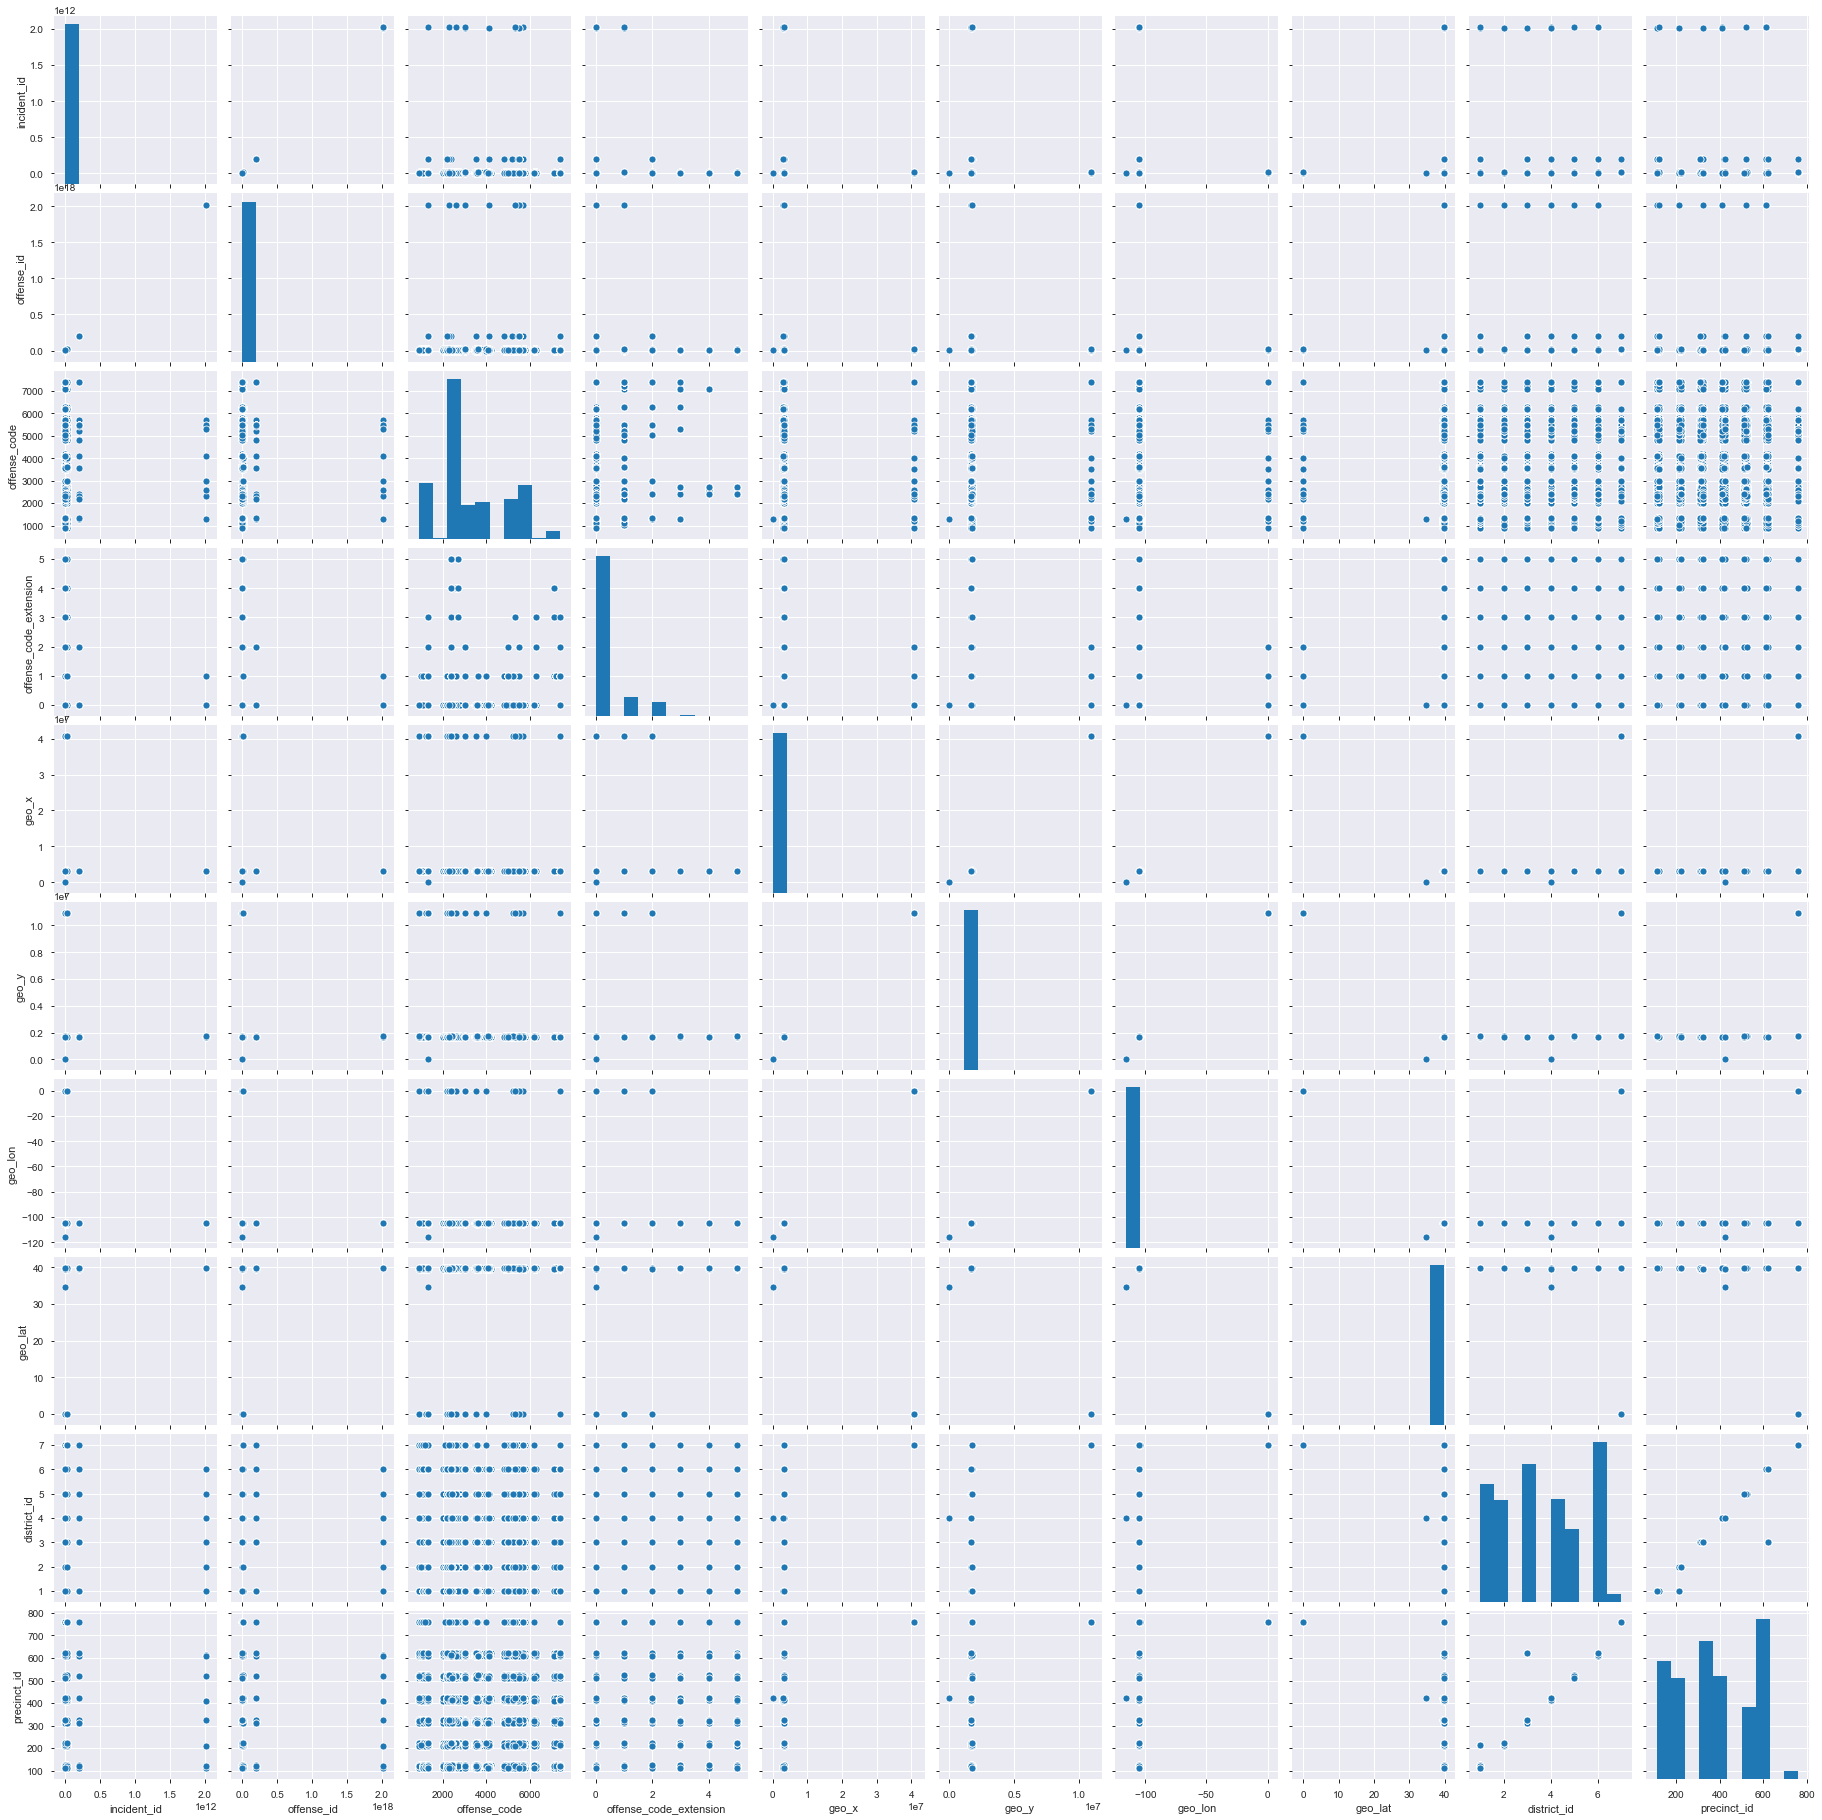

In [51]:
sns.pairplot(df)

#### Unique Values

In [52]:
df.nunique()

incident_id               337210
offense_id                370734
offense_code                 150
offense_code_extension         6
offense_type_id              195
offense_category_id           14
first_occurrence_date     237756
last_occurrence_date      116466
reported_date             314454
incident_address           85919
geo_x                      44261
geo_y                      42581
geo_lon                    86381
geo_lat                    86005
district_id                    7
precinct_id                   36
neighborhood                  78
dtype: int64

None of the values contain a single value. Single value features do not contribute to a predictive model and would have been removed if found.  

#### Duplicate Rows

In [53]:
dupe_rows_df = df[df.duplicated()]
dupe_rows_df

,incident_id,offense_id,offense_code,offense_code_extension,offense_type_id,offense_category_id,first_occurrence_date,last_occurrence_date,reported_date,incident_address,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood


There are no duplicate rows in the data.

#### Correlation Plot
  
  The possible correlations between features will be assessed visually.  
  Code taken from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

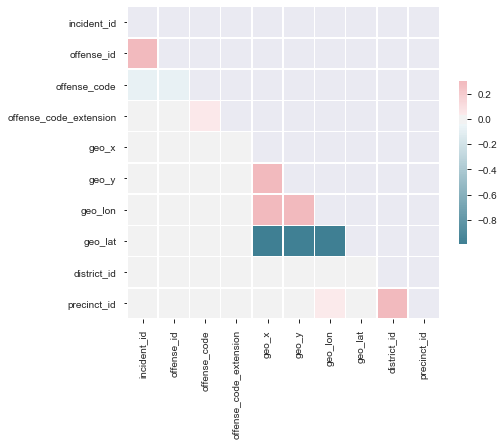

In [54]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 6))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [55]:
corr

,incident_id,offense_id,offense_code,offense_code_extension,geo_x,geo_y,geo_lon,geo_lat,district_id,precinct_id
incident_id,1.000000,1.000000,-0.077881,0.004795,0.001676,0.001880,0.002283,0.001847,0.025189,0.027555
offense_id,1.000000,1.000000,-0.077881,0.004795,0.001676,0.001880,0.002283,0.001847,0.025189,0.027555
offense_code,-0.077881,-0.077881,1.000000,0.050081,-0.003928,0.006396,-0.004033,0.007450,0.010637,0.010192
offense_code_extension,0.004795,0.004795,0.050081,1.000000,0.002194,0.002975,0.002216,-0.001565,-0.000375,0.000019
geo_x,0.001676,0.001676,-0.003928,0.002194,1.000000,0.992764,0.999926,-0.993982,0.032338,0.035711
geo_y,0.001880,0.001880,0.006396,0.002975,0.992764,1.000000,0.992793,-0.977039,0.034217,0.036905
geo_lon,0.002283,0.002283,-0.004033,0.002216,0.999926,0.992793,1.000000,-0.992889,0.034699,0.038240
geo_lat,0.001847,0.001847,0.007450,-0.001565,-0.993982,-0.977039,-0.992889,1.000000,-0.015722,-0.018389
district_id,0.025189,0.025189,0.010637,-0.000375,0.032338,0.034217,0.034699,-0.015722,1.000000,0.999229
precinct_id,0.027555,0.027555,0.010192,0.000019,0.035711,0.036905,0.038240,-0.018389,0.999229,1.000000


### EDA Pandas Profiling
Additional EDA will be performed using the Pandas Profiling library.  
The library implements numerous automated EDA functions with results presented in an interactive format.  More information on the library can be found here: 
- https://pypi.org/project/pandas-profiling
- https://github.com/pandas-profiling/pandas-profiling
- https://pandas-profiling.github.io/pandas-profiling/docs/master/index.html

In [56]:
eda_report = pp.ProfileReport(df_profile)
#eda_report.to_widgets() ...doesnt work... use the HTML implementation -> .to_notebook_iframe()
eda_report.to_notebook_iframe() # HTML implementation

MemoryError: Unable to allocate 3.63 MiB for an array with shape (476061,) and data type float64

The PhiK correlation provided by Pandas Profiling is very useful.  It natively handles mixed variable types, including categorical, and creates the correlation matrix.  
Looking at the matrix, it is clear that the target variable, 'charges', is positively correlated with "smoker' and 'age'.  Negative correlations exist between 'charges' and the rest of the variables, except for the number of children.  That feature appears not to be correlated with 'charges'.  It is a candidate for removal during feature engineering.  

#### Save cleaned data frame

In [ ]:
df.to_csv("df_cleaned.csv", index=False)